In [1]:
import tensorflow as tf
import tensorflow_hub as hub
# print("TensorFlow version: ", tf.__version__)
# print("TensorFlow Hub version: ",hub.__version__)

# # Check for GPU availability
# print("GPU ", "available (OKKKKKK)" if tf.config.list_physical_devices("GPU") else "not available" )

# # Check for TPU availability
# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
#   print(f'Running on a TPU w/{tpu.num_accelerators()["TPU"]} cores')

#   tf.config.experimental_connect_to_cluster(tpu)
#   tf.tpu.experimental.initialize_tpu_system(tpu)
#   tpu_strategy = tf.distribute.TPUStrategy(tpu)

# except ValueError:
#   print("TPU not available")

In [2]:
import pandas as pd
labels_csv = pd.read_csv("data/labels.csv")
print(labels_csv.head())
print(labels_csv.describe())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever
                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


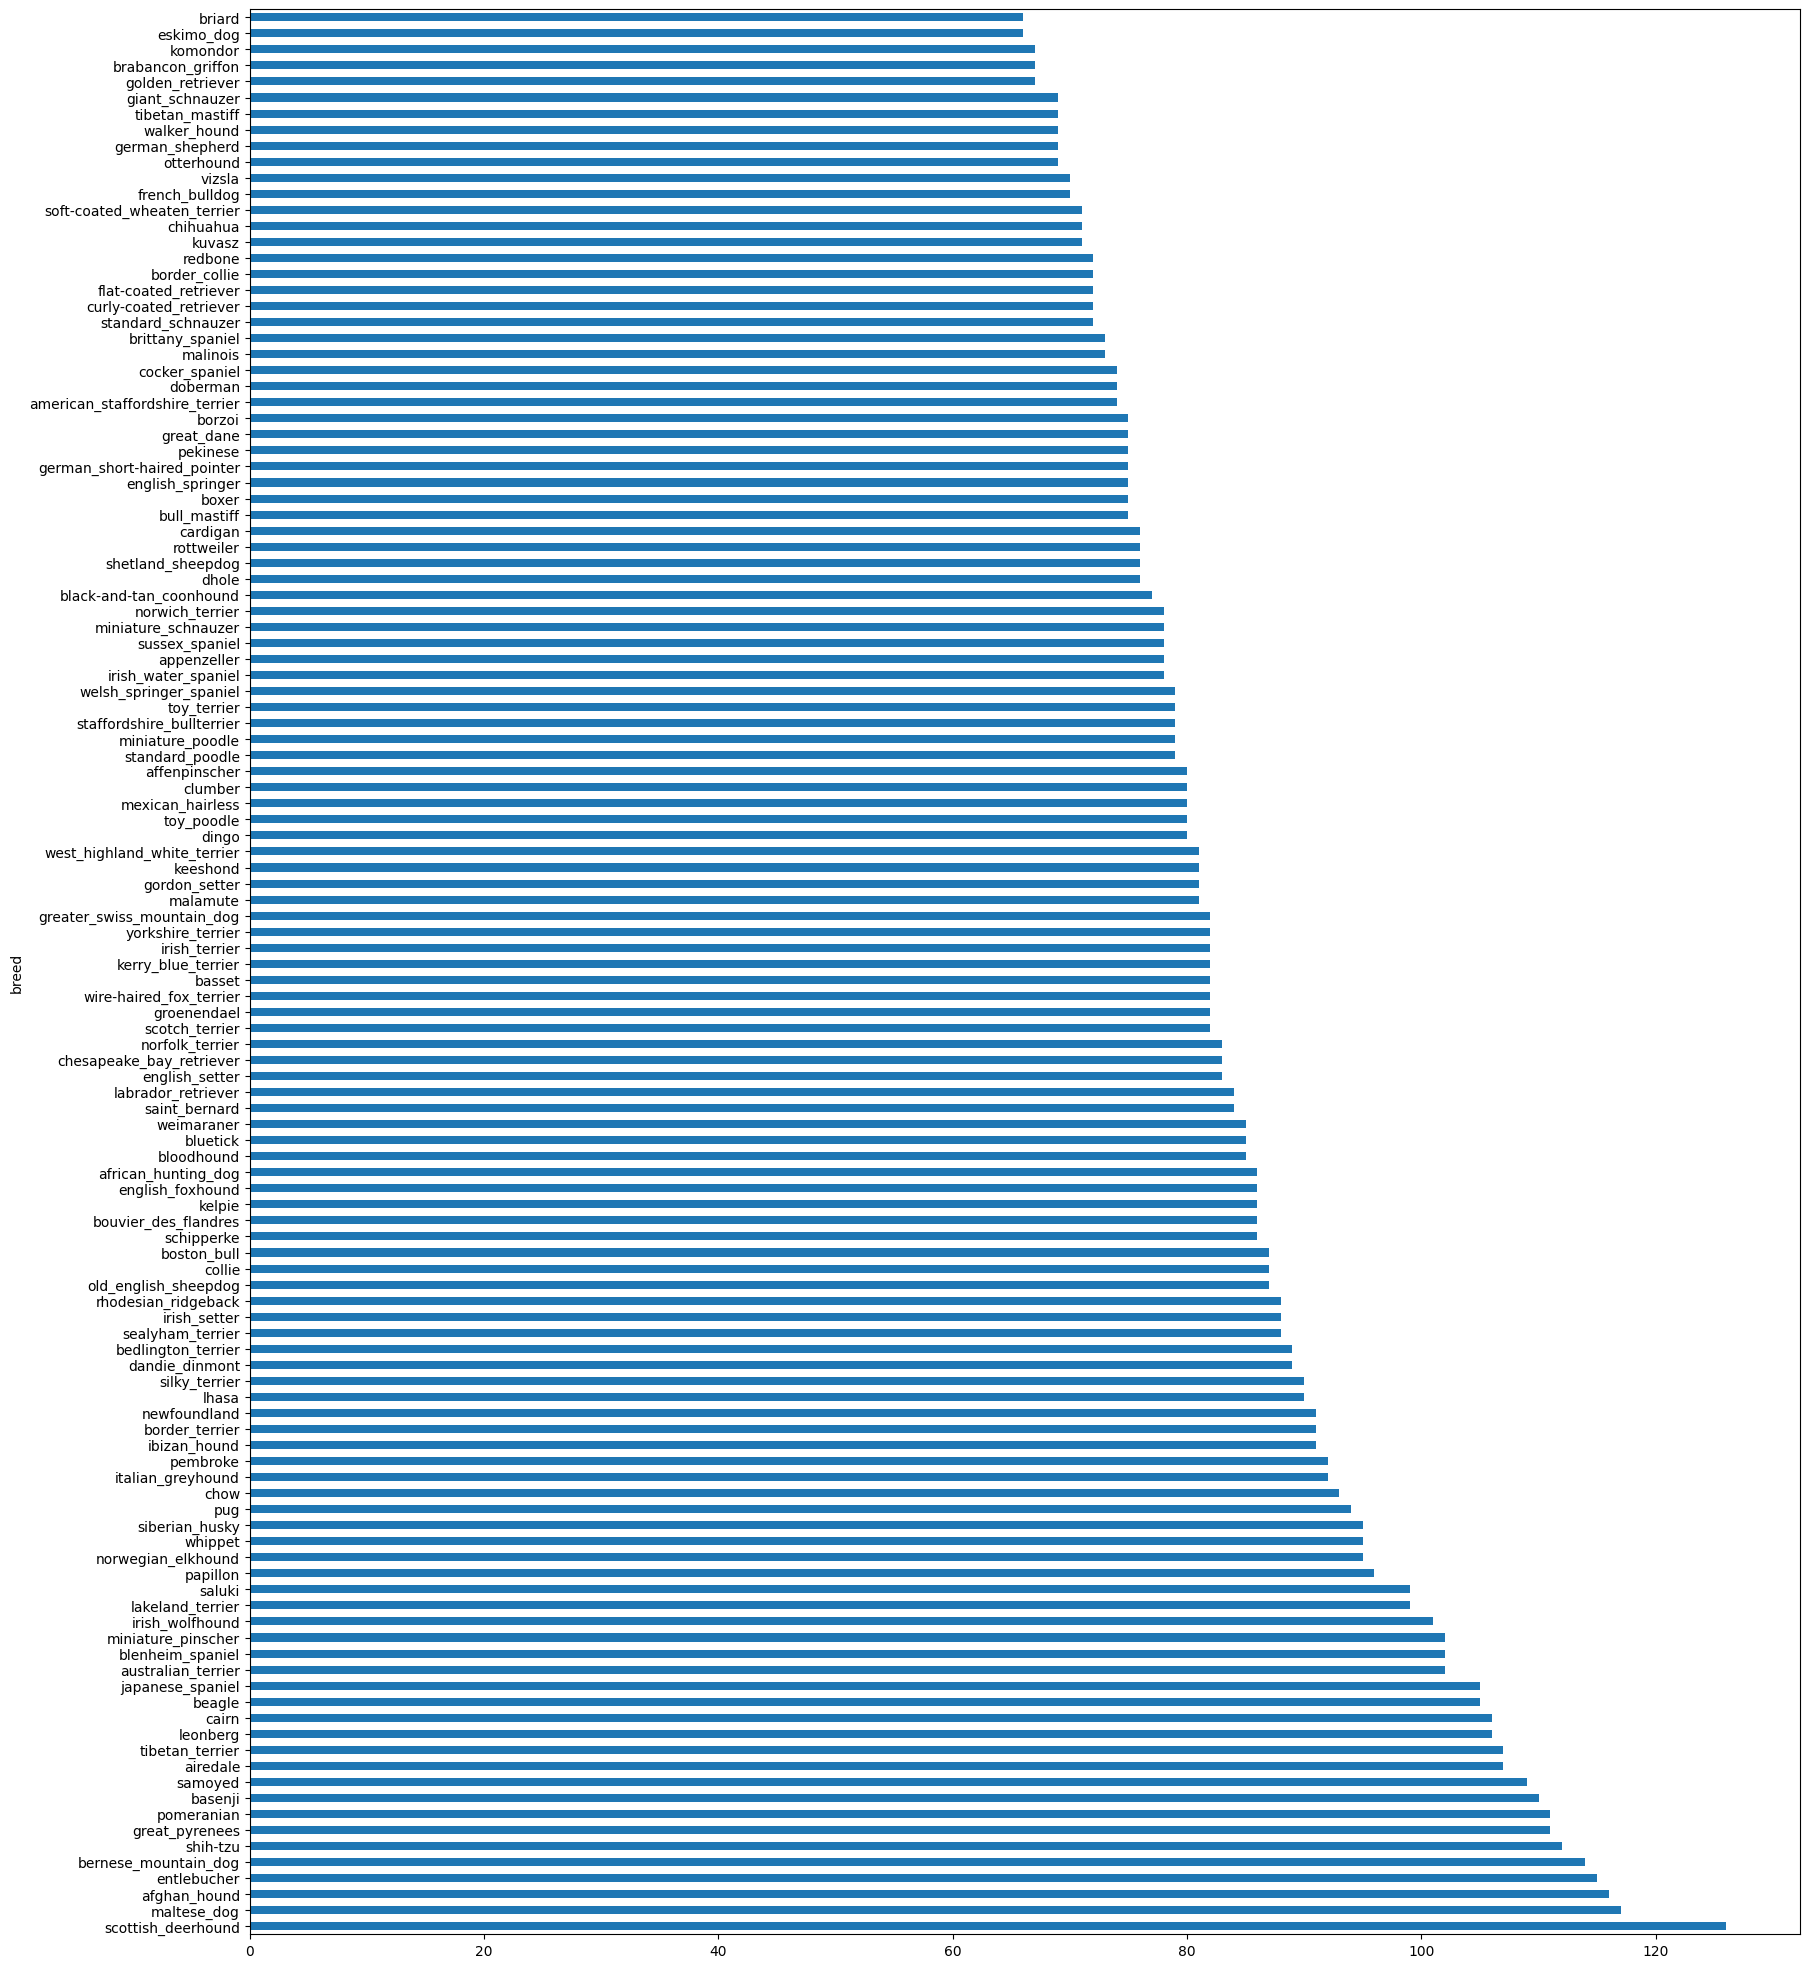

In [3]:
import matplotlib.pyplot as plt
labels_csv["breed"].value_counts().plot(kind="barh", figsize=(20, 25));

In [4]:
labels_csv["breed"].value_counts().median()

82.0

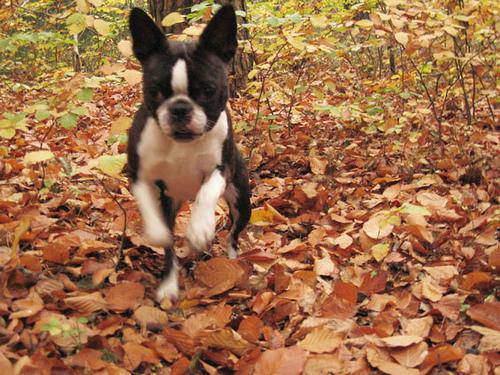

In [5]:
from IPython.display import Image
Image("data/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels

In [6]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
filenames = ["data/train/"+fname+ ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

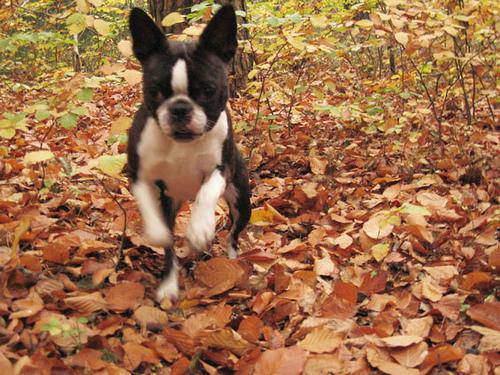

In [8]:
Image(filenames[0])

In [9]:
import os
os.listdir("data/train")[:10]

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
if len(os.listdir("data/train")) == len(filenames):
  print("Filenames matched with labels")
else:
  print("Filenames don't match with labels")

Filenames matched with labels


In [11]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels, len(labels)

(array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
        'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object),
 10222)

#### Check the number of labels matches the number of filenames

In [12]:
if len(labels) == len(filenames):
  print("Labels matched with filenames")
else:
  print("Labels don't match with filenames")

Labels matched with filenames


#### Unique label values

In [13]:
unique_breeds = np.unique(labels)
unique_breeds, len(unique_breeds)

(array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter', 'gre

#### Turn every label into a boolean array

In [14]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [15]:
len(labels)

10222

In [16]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [17]:
len(boolean_labels)

10222

In [18]:
print(labels[0])
print(f"Index where label occurs: {np.where(unique_breeds == labels[0])}")
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
Index where label occurs: (array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating validation set

In [19]:
x = filenames
y = boolean_labels

In [20]:
NUM_IMAGES = 1000

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [22]:
x_train[:2], y_train[:2]

(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False,

## Preprocessing Images (turning images into Tensors)

In [23]:
from matplotlib.pyplot import imread
image = imread(filenames[0])
image.shape #height, width

(375, 500, 3)

In [24]:
image.max(), image.min() #RGB

(255, 0)

In [25]:
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

In [26]:
IMG_SIZE = 224

def process_image(image_path, image_size=IMG_SIZE):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3) # RGB
  image = tf.image.convert_image_dtype(image, tf.float32) #change 0-255 to 0-1
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) #resize the image to (224, 224)

  return image


### Turning data into bathces

In [27]:
def get_iamge_label(image_path, label):

  image = process_image(image_path)
  return image, label # Main reason is to get a tuple `(image, label)`

In [28]:
BATCH_SIZE = 32

# y=None, test_data doesn't have labels
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Create a dataset of TF from x
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #filepaths
                                               tf.constant(y))) #labels
    data_batch = data.map(get_iamge_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y))
                                               )
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_iamge_label)

    data_batch = data.batch(BATCH_SIZE)
  return data_batch

#### Create training and validation data batches

In [29]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [30]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [31]:
unique_breeds[:5]

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier'], dtype=object)

In [32]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [33]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize=(12,12))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1) # row column index
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")     

In [34]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [35]:
train_images, train_labels = next(train_data.as_numpy_iterator()) # unbatche
len(train_images), len(train_labels)

(32, 32)

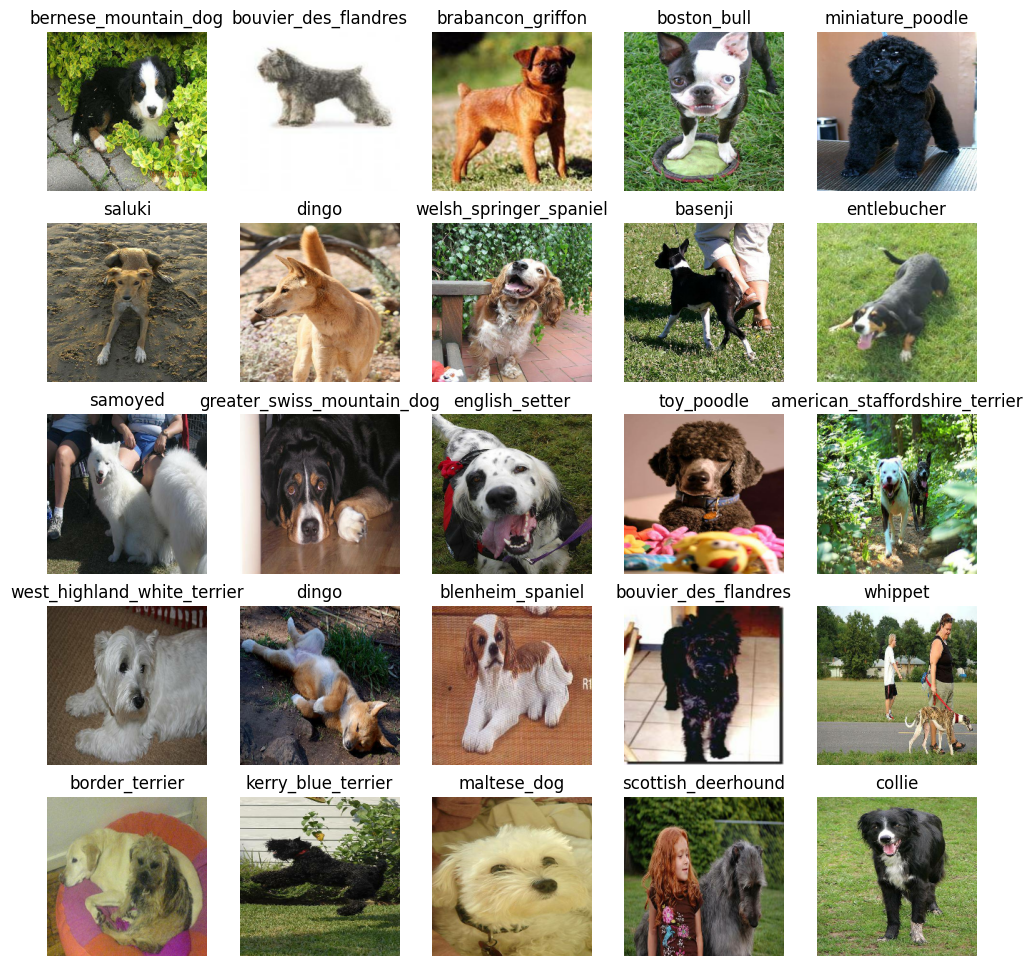

In [36]:
train_images, train_labels = next(train_data.as_numpy_iterator()) # unbatche
show_25_images(train_images, train_labels)

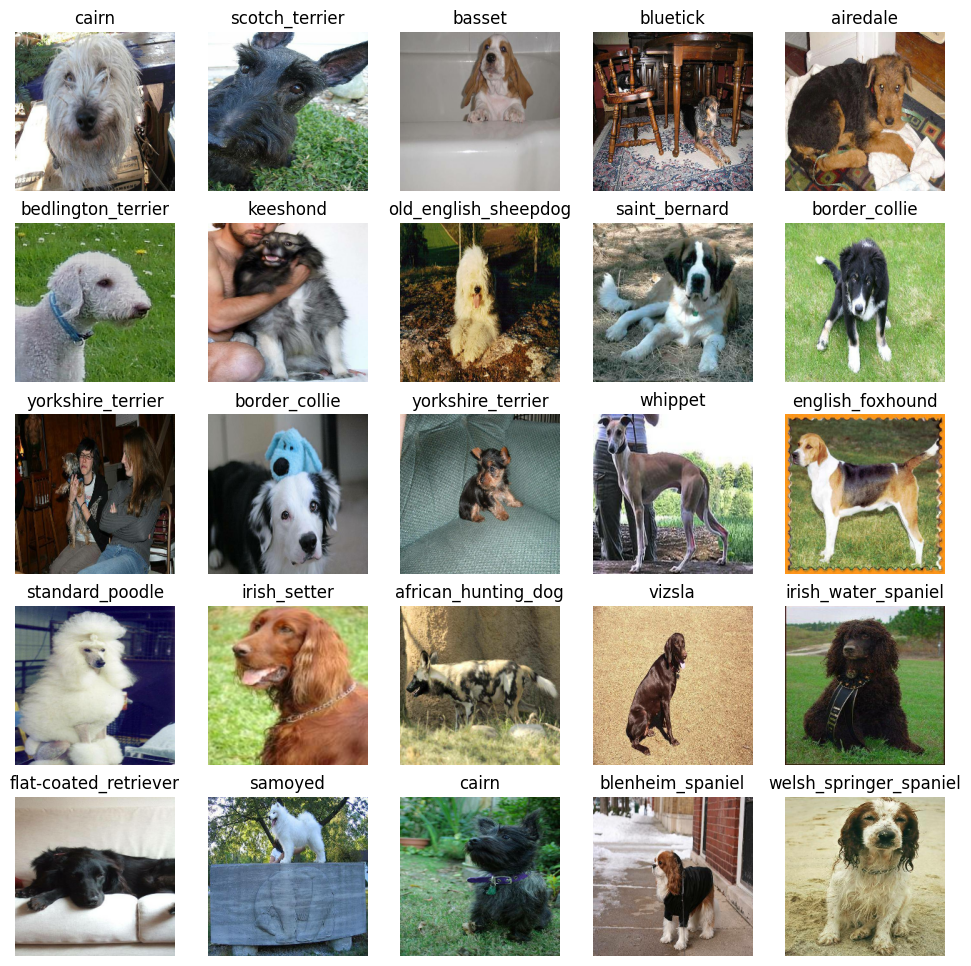

In [37]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [38]:
IMG_SIZE, len(unique_breeds)

(224, 120)

In [39]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, channels
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification" # "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/4" # "https://kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification"

In [40]:
import tf_keras

In [41]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
    print("Building model with: ", MODEL_URL)
    
    model = tf_keras.Sequential([
        hub.KerasLayer(MODEL_URL),
        tf_keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax")
    ])

    #? Hill story
    model.compile(
        loss = tf_keras.losses.CategoricalCrossentropy(), #? Height of the hill
        optimizer = tf_keras.optimizers.Adam(), #? Friend
        metrics = ["accuracy"] #? The Judge
    )
    
    model.build(INPUT_SHAPE)
    
    return model

In [42]:
model = create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Callbacks

#### TensorBoard

In [43]:
%load_ext tensorboard

In [44]:
import datetime

def create_tensorboard_callback():
    logdir = os.path.join("data/logs",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf_keras.callbacks.TensorBoard(logdir)

#### Early Stopping Callback

In [45]:
early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model

#### On subset of data

In [46]:
NUM_EPOCHS = 100 

In [47]:
def train_model():
    model = create_model()
    
    tensorboard = create_tensorboard_callback()
    
    model.fit(x = train_data,
              epochs = NUM_EPOCHS,
              validation_data = val_data,
              validation_freq = 1,
              callbacks = [tensorboard, early_stopping])
    return model

In [48]:
# model = train_model()

#### Checking the TensorBoard logs

In [49]:
# %tensorboard --logdir D:/DS_AI/dog-vision/data/logs
#Optional

#### Making and evaluating predictions using a trained model

In [50]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [51]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 3s 302ms/step


array([[0.0125601 , 0.00081062, 0.00294074, ..., 0.01868431, 0.00310159,
        0.00110769],
       [0.00181759, 0.00858045, 0.06329914, ..., 0.03508435, 0.01430141,
        0.00328376],
       [0.00141036, 0.00463903, 0.00145767, ..., 0.00262526, 0.00182696,
        0.00121511],
       ...,
       [0.01397591, 0.00183091, 0.00065451, ..., 0.01399585, 0.00130729,
        0.00044642],
       [0.00085503, 0.00153079, 0.00341209, ..., 0.00927207, 0.00093306,
        0.00220743],
       [0.0045688 , 0.00672907, 0.00288988, ..., 0.00342799, 0.00481928,
        0.00059527]], dtype=float32)

In [52]:
predictions.shape

(200, 120)

In [53]:
len(y_val), len(unique_breeds)

(200, 120)

In [54]:
np.sum(predictions[0])

1.0

In [55]:
def get_pred_label(predictions_probabilities):
    return unique_breeds[np.argmax(predictions_probabilities)]

pred_label = get_pred_label(predictions[0])
pred_label

'pekinese'

In [56]:
def unbatchify(data):
    imgaes = []
    labels = []
    for imgae, label in data.unbatch().as_numpy_iterator():
        imgaes.append(imgae)
        labels.append(unique_breeds[np.argmax(label)])
        
    return imgaes, labels

val_imgaes, val_labels = unbatchify(val_data)
val_imgaes[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [57]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    pred_label = get_pred_label(pred_prob)
    
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), 
                                color = color)

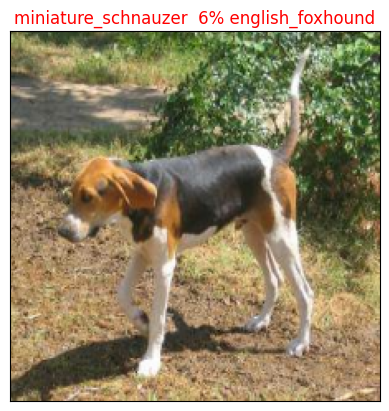

In [58]:
plot_pred(prediction_probabilities=predictions, labels=val_labels, images=val_imgaes, n = 42)

In [59]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
    pred_prob, true_label = prediction_probabilities[n], labels[n]
    
    pred_label = get_pred_label(pred_prob)
    
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color = "grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels = top_10_pred_labels,
               rotation = "vertical")
    
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass
    

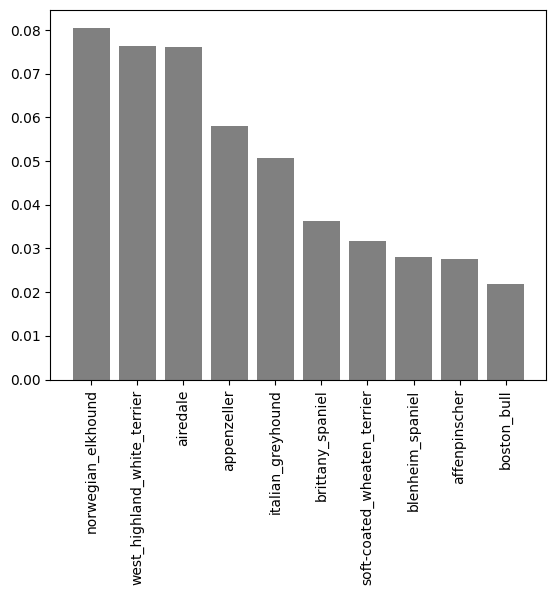

In [60]:
plot_pred_conf(prediction_probabilities = predictions, labels = val_labels, n = 9)

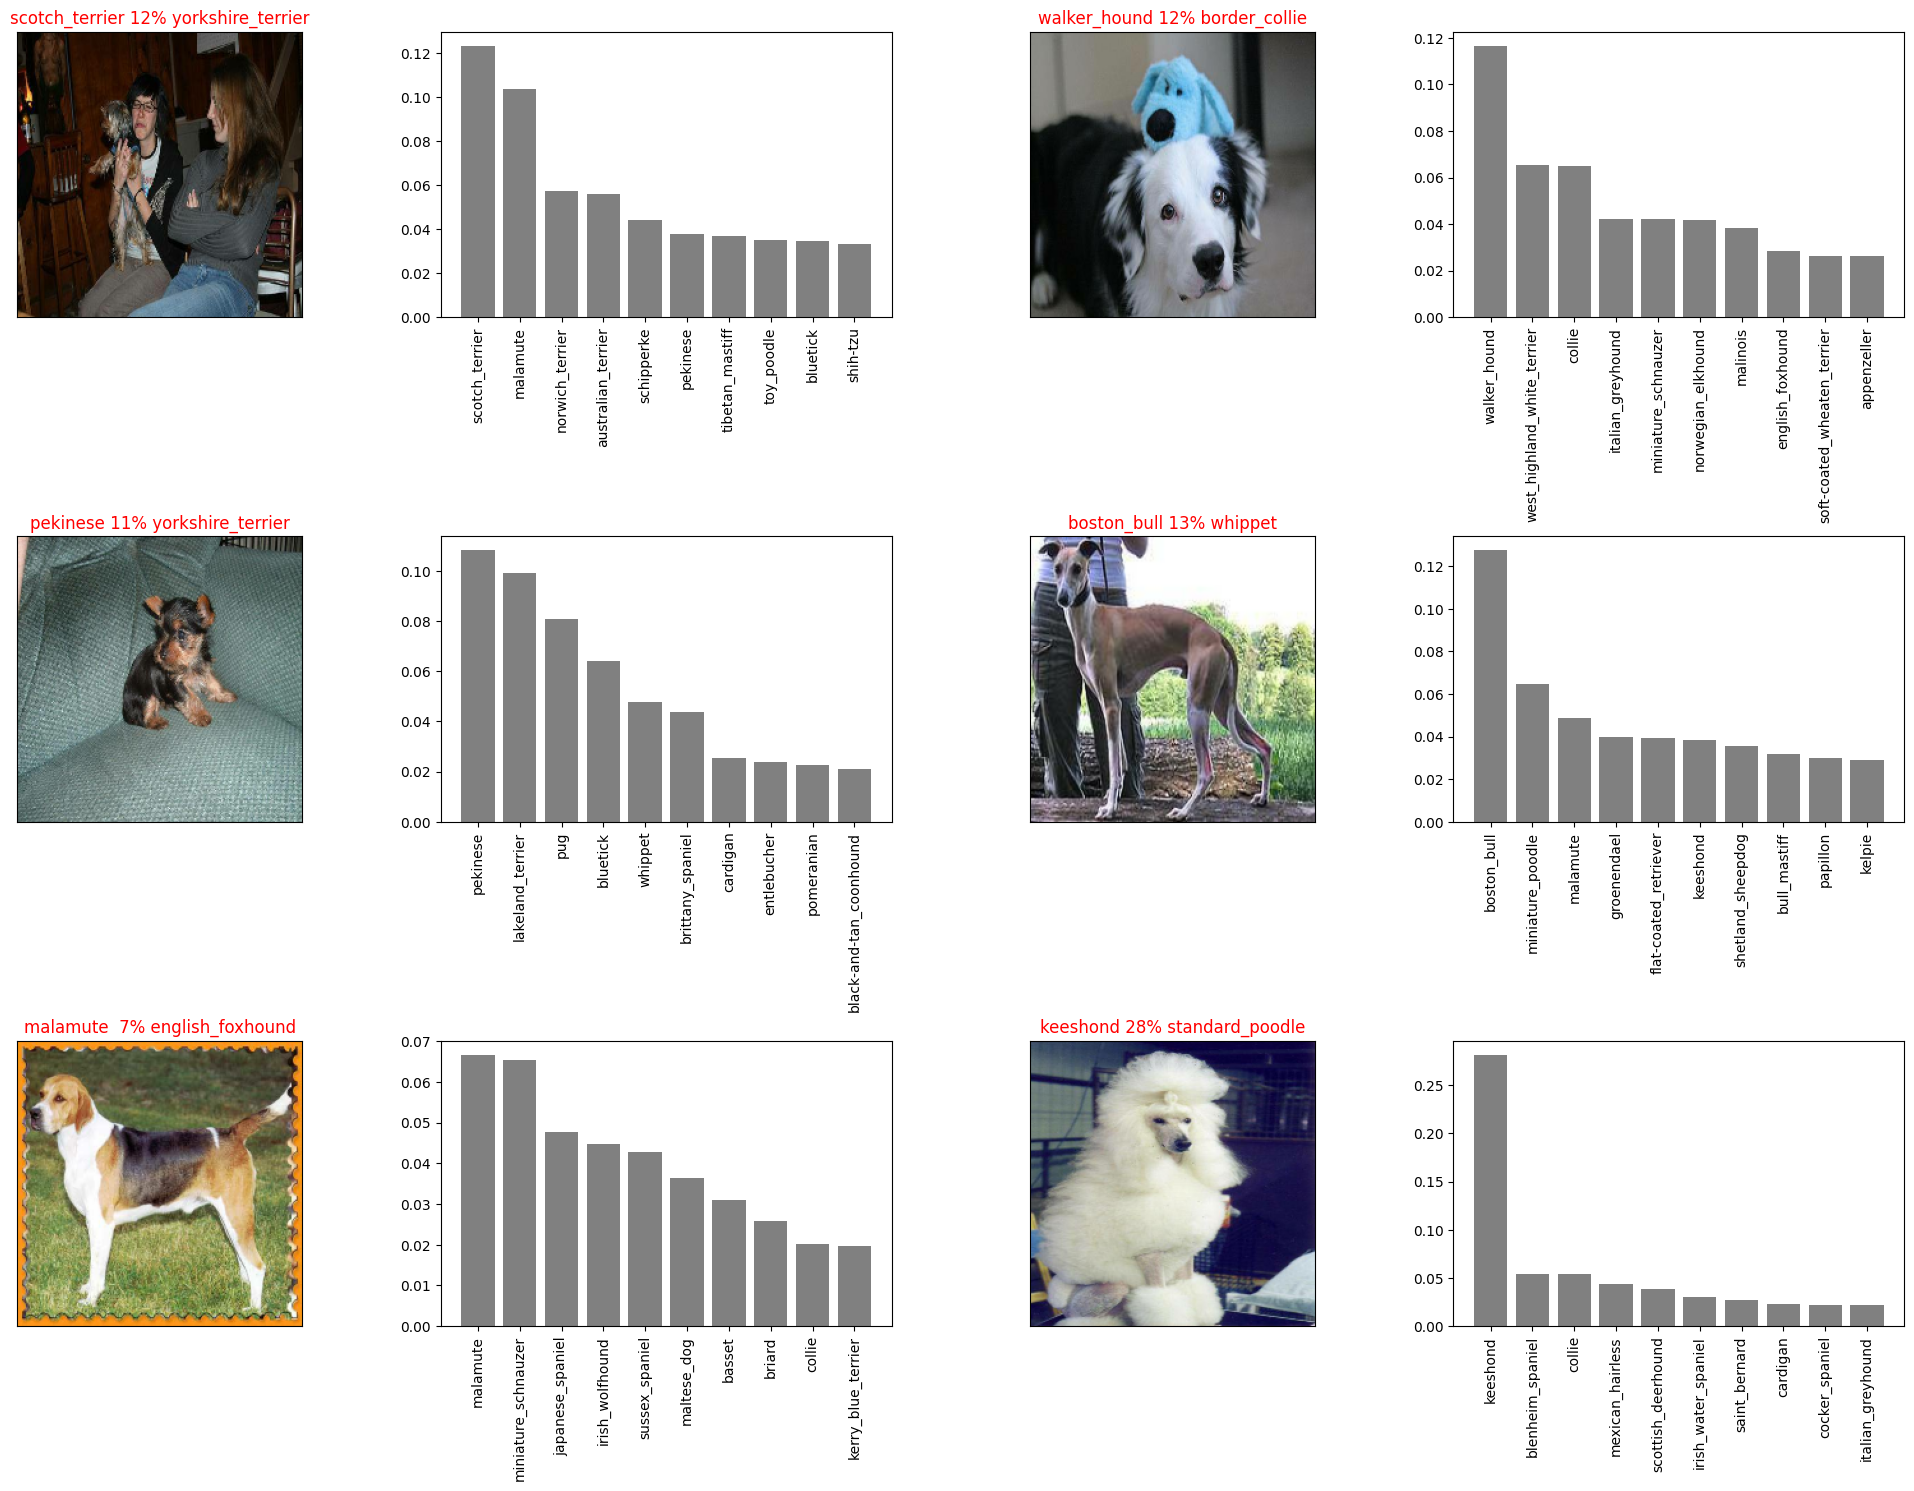

In [61]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels = val_labels,
              images = val_imgaes,
              n = i + i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_pred_conf(prediction_probabilities=predictions,
                   labels = val_labels,
                   n = i + i_multiplier)
plt.tight_layout(h_pad = 1.0)
plt.show()

## Saving and reloading a trained model

In [62]:
def save_model(mode, suffix = None):
    modeldir = os.path.join("data/models",
                            datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5"
    print(f"Saving model to: {model_path}")
    model.save(model_path)
    return model_path

In [63]:
def load_model(model_path):
    print(f"Loading saved model from: {model_path}")
    model = tf_keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer": hub.KerasLayer})
    return model

In [64]:
# save_model(model, suffix = "1000-images-mobilenetv2-Adam")

In [65]:
loaded_1000_images_model = load_model("data/models/20241014-154805-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: data/models/20241014-154805-1000-images-mobilenetv2-Adam.h5


In [66]:
# Pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 3s 296ms/step - loss: 5.7109 - accuracy: 0.0050


[5.710908889770508, 0.004999999888241291]

In [67]:
#The loaded model
loaded_1000_images_model.evaluate(val_data)

7/7 [==============================] - 3s 292ms/step - loss: 1.1876 - accuracy: 0.6850


[1.1876181364059448, 0.6850000023841858]

## Training model on the full data

In [68]:
len(x), len(y)

(10222, 10222)

In [69]:
x_train[:5], len(x_train)

(['data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 800)

In [70]:
full_data = create_data_batches(x, y)
full_data

Creating training data batches...


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [71]:
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification


In [72]:
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf_keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [73]:
# full_model.fit(x = full_data,
#                epochs=NUM_EPOCHS,
#                callbacks=[full_model_tensorboard, full_model_early_stopping])
# save_model(full_model, suffix = "full-imgae-set-mobilenetv2-Adam")

In [74]:
loaded_full_model = load_model("./data/models/20241014-164837-full-imgae-set-mobilenetv2-Adam.h5")

Loading saved model from: ./data/models/20241014-164837-full-imgae-set-mobilenetv2-Adam.h5


## Making predictions on the test dataset

In [75]:
test_path = "data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:5]

['data/test/000621fb3cbb32d8935728e48679680e.jpg',
 'data/test/00102ee9d8eb90812350685311fe5890.jpg',
 'data/test/0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'data/test/001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'data/test/001a5f3114548acdefa3d4da05474c2e.jpg']

In [76]:
len(test_filenames)

10357

In [77]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [78]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [79]:
# test_predictions = loaded_full_model.predict(test_data,
#                                              verbose=1)

## Making predictions on custom images

In [80]:
custom_path = "data/custom-test/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

In [81]:
custom_image_paths

['data/custom-test/dog-image-1.jpg',
 'data/custom-test/dog-image-2.jpg',
 'data/custom-test/dog-image-3.jpg',
 'data/custom-test/dog-image-4.jpg']

In [82]:
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [83]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 0s 444ms/step


In [84]:
custom_preds.shape

(4, 120)

In [85]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['dingo', 'boston_bull', 'samoyed', 'miniature_poodle']

In [86]:
custom_images = []
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)


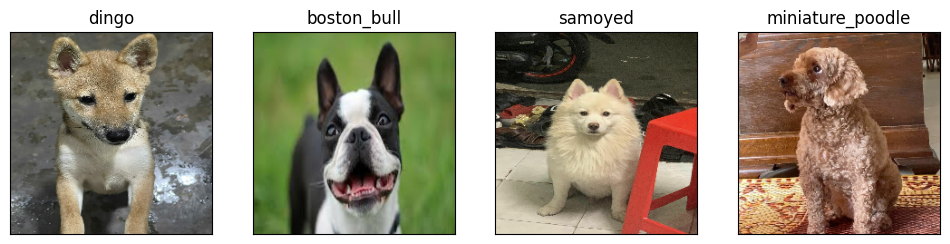

In [87]:
plt.figure(figsize=(12,12))
for i, image in enumerate(custom_images):
    plt.subplot(1, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)